# White supremacy classification performance results

In [27]:
# Load results from models
import os
import pandas as pd
import json

experiments = [
    # {'name': 'ws_neutral_annotated_test', 'model': 'ws_neutral', 'wandb_run': 'run-20221005_151644-2woifl38', 'epoch': 2.96},
    # {'name': 'ws_neutral_bias_test', 'model': 'ws_neutral', 'wandb_run': 'run-20221005_151644-2woifl38', 'epoch': 2.96},
    # {'name': '3epochs_domain_test', 'model': 'ws_neutral', 'wandb_run': 'run-20221005_151644-2woifl38', 'epoch': 2.96},
    # {'name': 'ws_antiracist_416000_test', 'model': 'ws_antiracist', 'wandb_run': 'run-20221025_151731-3fu66yyx'}
    {'name': 'ws_neutral_annotated_test', 'model': 'ws_neutral'},
    {'name': 'ws_neutral_bias_test', 'model': 'ws_neutral'},
    {'name': '3epochs_domain_test', 'model': 'ws_neutral'},
    {'name': 'ws_antiracist_416000_test', 'model': 'ws_antiracist'},
]

# Copy eval performance for models from logs when training
model_eval_perf = {'ws_neutral':
                          {'eval_loss': 0.2855835258960724, 'eval_accuracy': {'accuracy': 0.8795835469837618}, 'eval_precision': {'precision': 0.894347724404422}, 'eval_recall': {'recall': 0.8744695227971291}, 'eval_f1': {'f1': 0.8842969266745484}, 'eval_runtime': 1423.5039, 'eval_samples_per_second': 648.019, 'eval_steps_per_second': 20.251, 'epoch': 2.96},
                   'ws_antiracist':
                       {'eval_loss': 0.27164652943611145, 'eval_accuracy': {'accuracy': 0.8789687179677717}, 'eval_precision': {'precision': 0.8946584716765936}, 'eval_recall': {'recall': 0.8743356073194142}, 'eval_f1': {'f1': 0.8843803011718037}, 'eval_runtime': 1398.3536, 'eval_samples_per_second': 654.408, 'eval_steps_per_second': 20.45, 'epoch': 1.62},
                         }

dirpath = '../output/bert/'
dfs = []
for exp in experiments:
    
    # Load eval (same domains) performance (too complicated, just looking at wandb output)
    #log_fpath = os.path.join('../code/wandb/', exp['wandb_run'], 'files/output.log')
    #with open(log_fpath) as f:
    #    eval_lines = [json.loads(line) for line in f.read().splitlines() if line.startswith('{eval_loss')]
    #eval_line = [l for l in eval_lines if l['epoch'] == exp['epoch']][0]
    # Could also just run the eval again when run on other test datasets
    if exp['model'] in model_eval_perf:
        eval_perf = model_eval_perf[exp['model']]
        dfs.append(pd.DataFrame([{'dataset': 'eval', 'f1': eval_perf['eval_f1']['f1'], 
                             'precision': eval_perf['eval_precision']['precision'],
                             'recall': eval_perf['eval_recall']['recall'],
                             'accuracy': eval_perf['eval_accuracy']['accuracy'],
                             'model': exp['model']
                            }]))
    
    # Load test performance
    results_fpath = os.path.join(dirpath, exp['name'], 'results.jsonl')
    dfs.append(pd.read_json(results_fpath, orient='records', lines=True).assign(model=exp['model'], path=results_fpath))
results = pd.concat(dfs).drop_duplicates()
results = results[results.dataset != 'siegel2021']
results

,dataset,f1,precision,recall,accuracy,model,path,corpus
0,eval,0.884297,0.894348,0.874470,0.879584,ws_neutral,NaN,NaN
0,alatawi2021,0.695430,0.581651,0.864545,0.583292,ws_neutral,../output/bert/ws_neutral_annotated_test/resul...,NaN
2,siegel2021_white_nationalist_only,0.466942,0.307902,0.965812,0.535971,ws_neutral,../output/bert/ws_neutral_annotated_test/resul...,NaN
3,rieger2021,0.185420,0.102692,0.953804,0.402557,ws_neutral,../output/bert/ws_neutral_annotated_test/resul...,NaN
0,hatecheck_identity_nonhate,0.000000,0.000000,0.000000,0.438095,ws_neutral,../output/bert/ws_neutral_bias_test/results.jsonl,NaN
0,adl_heatmap,0.974516,1.000000,0.950298,0.950298,ws_neutral,../output/bert/3epochs_domain_test/results.jsonl,NaN
0,eval,0.884380,0.894658,0.874336,0.878969,ws_antiracist,NaN,NaN
0,alatawi2021,0.679828,0.561684,0.860909,0.553777,ws_antiracist,../output/bert/ws_antiracist_416000_test/resul...,annotated_test
2,siegel2021_white_nationalist_only,0.414414,0.262557,0.982906,0.415468,ws_antiracist,../output/bert/ws_antiracist_416000_test/resul...,annotated_test
3,rieger2021,0.187680,0.103858,0.972826,0.399651,ws_antiracist,../output/bert/ws_antiracist_416000_test/resul...,annotated_test


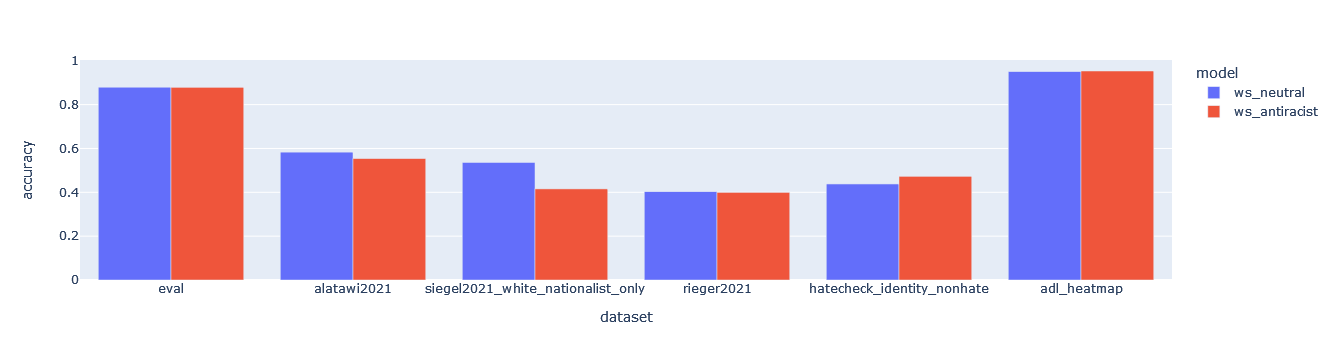

In [29]:
import plotly.express as px

px.bar(results, x='dataset', y='accuracy', color='model', barmode='group')

In [19]:
# Unnecessary
results_long = pd.melt(results.drop_duplicates(), id_vars=['dataset', 'model'], value_vars=['f1', 'precision', 'recall', 'accuracy'], var_name='score', ignore_index=True)
results_long

,dataset,model,score,value
0,eval,ws_neutral,f1,0.884297
1,alatawi2021,ws_neutral,f1,0.695430
2,siegel2021,ws_neutral,f1,0.586538
3,siegel2021_white_nationalist_only,ws_neutral,f1,0.466942
4,rieger2021,ws_neutral,f1,0.185420
5,hatecheck_identity_nonhate,ws_neutral,f1,0.000000
6,adl_heatmap,ws_neutral,f1,0.974516
7,eval,ws_antiracist,f1,0.884380
8,alatawi2021,ws_antiracist,f1,0.679828
9,siegel2021,ws_antiracist,f1,0.538574
